Where can people find affordable housing?

I looked to the state for the data and found it here: OHCS Home Page / Multifamily Funding: Data Resources / Housing Inventory Data (http://www.oregon.gov/ohcs/Pages/research-multifamily-housing-inventory-data.aspx)

I downloaded the Affordable Housing Inventory in Oregon excel spreadsheet (http://www.oregon.gov/ohcs/ISD/RA/housing-profiles/affordable-housing-oregon-inventory.xls) to my working directory.

Now I can load it and take a look.

In [1]:
import xlrd
from xlrd.sheet import ctype_text
import copy
import numpy as np
from pandas import DataFrame
import pandas as pd

def getcell(sheet, row, col):
    cell_obj = sheet.cell(row, col)
    dtype = ctype_text.get(cell_obj.ctype,'unknown')
    if (dtype == 'text'):
        cell = cell_obj.value.strip()
        #ignore missing data (-)
        if cell == '-':
            cell = 0
            dtype = 'number'
    else:
        cell = int(cell_obj.value)
        dtype = 'number'
    return cell, dtype

workbook = xlrd.open_workbook("affordable-housing-oregon-inventory.xls")
x1_sheet = workbook.sheet_by_index(0)
if x1_sheet is None:
    print ("sheet 0 does not exist")
else:
    rowtotal = x1_sheet.nrows
    coltotal = x1_sheet.ncols
    startReport = False
    lol = []
    rowlist = []
    header = []
    ident = []
    #First row is the headers
    cell, dtype = getcell(x1_sheet,0,1)
    if dtype != 'empty':
        if (dtype == 'text'):
            for j in range(1,coltotal):
                cell, dtype = getcell(x1_sheet,0,j)
                if cell != '':
                    rowlist.append(cell)
            header=copy.copy(rowlist)
            rowlist.clear()    
    # The data starts on row index 1
    for i in range(1, rowtotal): 
        cell, dtype = getcell(x1_sheet,i,1)
        if dtype != 'empty':
            if (dtype == 'text'):
                cell, dtype = getcell(x1_sheet,i,0)
                if cell != '':
                    ident.append(cell)
                for j in range(1,coltotal):
                    cell, dtype = getcell(x1_sheet,i,j)
                    if cell != '':
                        rowlist.append(cell)
                lol.append(copy.copy(rowlist))
                rowlist.clear()

# Take the headers and list of lists data into Pandas DataFrame
frame = DataFrame(lol,columns=header,index=ident)
 

This Pandas DataFrame now contains the data from the spreadsheet. Let's take a look.

In [2]:
frame

,NAME,TOTAL,AFFORDABLE,ADDRESS,CITY,ZIP,COUNTY,ADR,ALF,CC,CMI,DD,DV,ELD,EO/RO,FAM,FW,HIV,HOM,PD
O-00262,1640 17TH ST,1,1,1640 17TH ST,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00264,1650 17TH ST,1,1,1650 17TH ST,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00440,220 FOOTHILL,1,1,220 FOOTHILL DR,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00463,230 FOOTHILL,1,1,230 FOOTHILL DR,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00477,240 FOOTHILL,1,1,240 FOOTHILL DR,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00486,250 FOOTHILL,1,1,250 FOOTHILL DR,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00595,3455 AUBURN,1,1,3455 AUBURN AVE,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-00596,3465 AUBURN,1,1,3465 AUBURN AVE,BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,1,0,0,0,0.0
O-01277,BAKER FAMILY SCATTERED,8,8,(UNKNOWN),BAKER CITY,97814,BAKER,0,0,0,0,0,0,0,0,8,0,0,0,0.0
O-01366,BROOKSIDE MANOR,20,20,1600C ELDON AVE,BAKER CITY,97814,BAKER,0,0,0,0,0,0,20,0,0,0,0,0,0.0


The first column is a unique index. There is a second sheet in the workbook that describes the codes in the columns. 

We can do some quick calculations on the data. For example, we might find out what percentage of the total units are affordable in the whole state.

In [3]:
frame['AFFORDABLE'].sum()/frame['TOTAL'].sum()

0.9264833346465999

We might see which counties have the most affordable housing. 
One way to do this is to do some grouping by county with a python loop.

In [4]:
print("Total available housing per county")
for county in set(frame['COUNTY']):
    total = frame['TOTAL'][frame['COUNTY'] == county].sum()
    print("{}: {}".format(county,total))


Total available housing per county
MULTNOMAH: 29808
HOOD RIVER: 704
JOSEPHINE: 896
TILLAMOOK: 476
WHEELER: 19
DESCHUTES: 1951
CROOK: 248
POLK: 881
UNION: 598
CURRY: 407
COOS: 797
COLUMBIA: 531
BAKER: 189
CLACKAMAS: 4526
LANE: 5747
GILLIAM: 37
UMATILLA: 1627
JEFFERSON: 340
BENTON: 625
GRANT: 114
CLATSOP: 586
HARNEY: 157
LINN: 1413
SHERMAN: 12
YAMHILL: 1479
JACKSON: 3722
KLAMATH: 527
LAKE: 50
MARION: 4258
MORROW: 296
WASCO: 783
WASHINGTON: 8648
LINCOLN: 1163
WALLOWA: 187
MALHEUR: 607
DOUGLAS: 1737


We should fix the zipcode which has been imported as a float64 and change it to an int64. However, when doing this we run into an error. It seems that some of the entries in the "PD" column are not a number.

In [5]:
#newframe= frame.astype({'ZIP':'int64', 'TOTAL':'int64', 'AFFORDABLE':'int64', 'ADR':'int64', 'ALF':'int64', 'CC':'int64', 'CMI':'int64', 'DD':'int64', 'DV':'int64', 'ELD':'int64', 'EO/RO':'int64', 'FAM':'int64', 'FW':'int64', 'HIV':'int64', 'HOM':'int64', 'PD':'int64'})
frame[np.isnan(frame['PD'])]

,NAME,TOTAL,AFFORDABLE,ADDRESS,CITY,ZIP,COUNTY,ADR,ALF,CC,CMI,DD,DV,ELD,EO/RO,FAM,FW,HIV,HOM,PD
O-01243,ARIEL GLEN,70,70,1700 SE TEMPEST DR,BEND,97702,DESCHUTES,0,0,0,0,0,0,0,70,0,0,0,0,NaN
O-01454,CENTENNIAL POINT,4,4,410 SE 4TH ST,BEND,97702,DESCHUTES,4,0,0,0,0,0,0,0,0,0,4,0,NaN
O-02809,STEPPING STONES,5,5,741 SW 14TH ST,REDMOND,97756,DESCHUTES,0,0,0,0,5,0,0,0,0,0,0,0,NaN


In [6]:
frame.loc[np.isnan(frame['PD']),'PD']=0
newframe1= frame.astype({'ZIP':'int64', 'TOTAL':'int64', 'AFFORDABLE':'int64', 'ADR':'int64', 'ALF':'int64', 'CC':'int64', 'CMI':'int64', 'DD':'int64', 'DV':'int64', 'ELD':'int64', 'EO/RO':'int64', 'FAM':'int64', 'FW':'int64', 'HIV':'int64', 'HOM':'int64', 'PD':'int64'})


A better way is to use the DataFrame functions.

In [7]:
frame2 = newframe1.set_index(['COUNTY','CITY','ZIP','NAME'])
frame2

TOTAL  AFFORDABLE  \
COUNTY  CITY        ZIP   NAME                                              
BAKER   BAKER CITY  97814 1640 17TH ST                      1           1   
                          1650 17TH ST                      1           1   
                          220 FOOTHILL                      1           1   
                          230 FOOTHILL                      1           1   
                          240 FOOTHILL                      1           1   
                          250 FOOTHILL                      1           1   
                          3455 AUBURN                       1           1   
                          3465 AUBURN                       1           1   
                          BAKER FAMILY SCATTERED            8           8   
                          BROOKSIDE MANOR                  20          20   
                          ELDON COURT                      10          10   
                          ELKHORN VILLAGE                  36          36   
                          ELMS                             24          23   
                          GREEN ACRES                      24          20   
                          GROVE                            30          30   
                          HOMES ENABLING LIVABILITY I       1           1   
                          HOMES ENABLING LIVABILITY II      2           2   
                          LA CASA VIDA                      5           5   
        HAINES      97833 HAINES FAMILY PUBLIC HOUSING      8           8   
                          HAINES HOME BUYING                3           3   
        RICHLAND    97870 RICHLAND SCHOOL                  10          10   
BENTON  CORVALLIS   97333 1940 SE STONE STREET              5           5   
                          2230 RYAN STREET                  5           5   
                          2580 SW LEONARD STREET            5           5   
                    97330 BENTON COUNTY ARC                 1           1   
                    97333 BENTON PLAZA                     55          11   
                          CAMAS COMMONS                    56          56   
                          CEDAR CREST                      40          40   
                          CNHS SOUTH CORVALLIS             14           9   
                    97330 CNHS SYCAMORE HOUSING REHAB       6           6   
...                                                       ...         ...   
YAMHILL MCMINNVILLE 97128 REDWOOD COMMONS                  64          64   
                          SOUTHSIDE                         5           5   
                          SUNFLOWER PARK                   33          33   
                          SUNNYSIDE                        15          15   
                          THIRD STREET                      5           5   
                          TICE PARK                        88          88   
                          VALLEY'S EDGE I                   1           1   
                          VALLEY'S EDGE II                  1           1   
                          VILLA DEL SOL                    24          24   
                          VILLA WEST                       48          48   
                          VILLAGE QUARTER                  50          50   
                          VILLAS OF MCMINNVILLE            87          18   
                          WESTERN TERRACES                 32          32   
                          WILLAMETTE PLACE I               24          24   
                          WILLAMETTE PLACE II              24          24   
        NEWBERG     97132 1105 JAMES STREET                 5           5   
                          918 CHARLES STREET                5           5   
                          CAMELLIA COURT                   24          24   
                          DEBORAH COURT                    40          40   
                          DESKINS COMMONS           

In [8]:
county_sum = frame2.sum(level='COUNTY')
county_sum.sort_values('AFFORDABLE',ascending=False)

,TOTAL,AFFORDABLE,ADR,ALF,CC,CMI,DD,DV,ELD,EO/RO,FAM,FW,HIV,HOM,PD
COUNTY,,,,,,,,,,,,,,,
MULTNOMAH,29808,27019,2097,183,20,1937,1697,142,5671,177,18567,193,69,1574,2248
WASHINGTON,8648,8499,46,0,0,38,159,0,698,0,7464,159,0,9,177
LANE,5747,5341,24,142,0,128,192,0,1409,50,3618,11,3,151,280
CLACKAMAS,4526,4314,0,134,0,50,80,0,937,0,2896,134,6,18,40
MARION,4258,3852,41,175,0,21,204,17,1049,6,2295,251,0,38,32
JACKSON,3722,3473,109,0,0,27,49,53,1060,0,2099,113,4,107,237
DESCHUTES,1951,1869,4,82,0,14,54,0,603,70,1077,0,4,102,5
DOUGLAS,1737,1549,15,152,0,16,51,5,374,17,871,0,0,138,14
UMATILLA,1627,1536,24,98,0,19,56,1,306,12,1169,47,0,3,0


We could limit this to the top ten counties and make a bar chart of it.

In [9]:
top_ten_affordable_counties = county_sum.sort_values('AFFORDABLE',ascending=False)[:10]['AFFORDABLE']

In [10]:
top_ten_affordable_counties

COUNTY
MULTNOMAH     27019
WASHINGTON     8499
LANE           5341
CLACKAMAS      4314
MARION         3852
JACKSON        3473
DESCHUTES      1869
DOUGLAS        1549
UMATILLA       1536
LINN           1309
Name: AFFORDABLE, dtype: int64

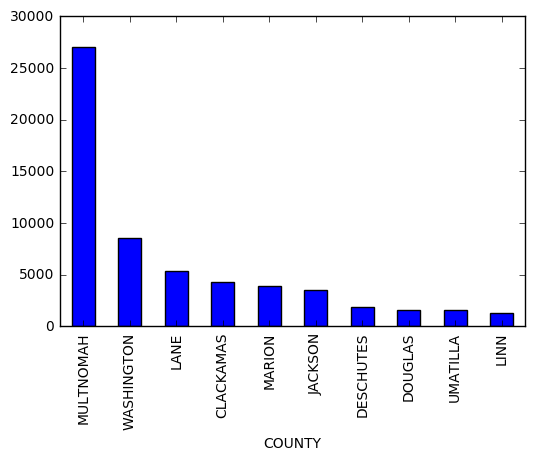

In [11]:
%matplotlib inline
top_ten_affordable_counties.plot(kind='bar')


It would be a similar process to break down by zipcode

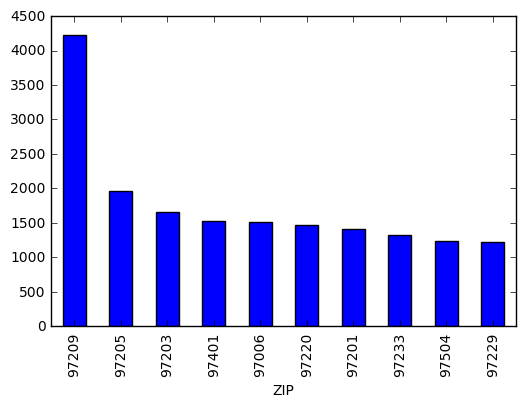

In [12]:
zip_sum = frame2.sum(level='ZIP')
top_affordable_zipcodes = zip_sum.sort_values('AFFORDABLE',ascending=False)[:10]

top_affordable_zipcodes['AFFORDABLE'].plot(kind='bar')
#zip_sum

If we wanted to see the number of affordable housing per capita in each county, we would need to know the population of each county. I found the data I wanted for 2015 at https://www.pdx.edu/prc/population-reports-estimates

In [13]:
counties = pd.Series(data=['BAKER', 'BENTON', 'CLACKAMAS', 'CLATSOP', 'COLUMBIA',
                           'COOS', 'CROOK', 'CURRY', 'DESCHUTES', 'DOUGLAS',
                           'GILLIAM', 'GRANT', 'HARNEY', 'HOOD RIVER', 'JACKSON',
                           'JEFFERSON', 'JOSEPHINE', 'KLAMATH', 'LAKE', 'LANE',
                           'LINCOLN', 'LINN', 'MALHEUR', 'MARION', 'MORROW',
                           'MULTNOMAH', 'POLK', 'SHERMAN', 'TILLAMOOK', 'UMATILLA',
                           'UNION', 'WALLOWA', 'WASCO', 'WASHINGTON', 'WHEELER', 'YAMHILL'
                           ])

In [14]:
population = pd.Series(data=[16425, 90005, 397385, 37750, 50390,
                             62990, 21085, 22470, 170740, 109910,
                             1975, 7430, 7295, 24245, 210975, 
                             22445, 83720, 67110, 8010, 362150,
                             47225, 120860, 31480, 329770, 11630,
                             777490, 78570, 1790, 25690, 79155,
                             26625, 7100, 26370, 570510, 1445, 103630
                            ])